# Common stability analysis

This notebook examines the relationship between commonly DE genes and the stability of those genes

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import utils, paths

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


### Get common DE statistics

In [2]:
# Load summary statistics generated by SOPHIE using the PAO1 and PA
pao1_common_DEGs_filename = "find_common_DEGs/generic_gene_summary_SRP117105.tsv"
pa14_common_DEGs_filename = "find_common_DEGs/generic_gene_summary_SRP074292.tsv"


pao1_SOPHIE_stats = pd.read_csv(
    pao1_common_DEGs_filename, sep="\t", index_col=0, header=0
)
pa14_SOPHIE_stats = pd.read_csv(
    pa14_common_DEGs_filename, sep="\t", index_col=0, header=0
)

In [3]:
print(pao1_SOPHIE_stats.shape)
pao1_SOPHIE_stats.head()

(5563, 14)


,Gene ID,Adj P-value (Real),Rank (Real),abs(log2FoldChange) (Real),log2FoldChange (Real),Median adj p-value (simulated),Rank (simulated),Percentile (simulated),Percent DE (simulated),Mean abs(log2FoldChange) (simulated),Std deviation (simulated),Number of experiments (simulated),Z score,Gene Name
PA3328,PA3328,4.917896e-25,5563.0,4.298007,4.298007,0.999256,5488.0,98.651564,0.0,0.340896,0.202712,25,19.520883,NaN
PA2303,PA2303,1.487221e-29,5562.0,4.048551,4.048551,0.999672,5445.0,97.878461,0.0,0.266379,0.168746,25,22.413449,ambD
PA4211,PA4211,2.207451e-24,5561.0,3.976647,3.976647,0.682754,5553.0,99.820209,0.0,0.453517,0.274850,25,12.818364,phzB1
PA3332,PA3332,2.012572e-11,5560.0,3.946715,3.946715,0.999256,5500.0,98.867314,0.0,0.294430,0.185347,25,19.705152,NaN
PA1431,PA1431,8.933852e-68,5559.0,3.730831,3.730831,0.999672,4915.0,88.349515,0.0,0.178405,0.165709,25,21.437724,rsaL


### Get stability statistics

In [4]:
# Load transcriptional similarity df
# These are the subset of genes that we will consider
pao1_similarity_scores_filename = "../3_core_core_analysis/pao1_similarity_scores.tsv"
pa14_similarity_scores_filename = "../3_core_core_analysis/pa14_similarity_scores.tsv"

pao1_similarity_scores = pd.read_csv(
    pao1_similarity_scores_filename, sep="\t", header=0, index_col=0
)
pa14_similarity_scores = pd.read_csv(
    pa14_similarity_scores_filename, sep="\t", header=0, index_col=0
)

In [5]:
print(pao1_similarity_scores.shape)
pao1_similarity_scores.head()

(5349, 5)


,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label
PAO1 id,,,,,
PA1950,PA14_39280,0.353718,1.962739e-157,rbsK,NaN
PA4872,PA14_64440,0.381711,4.085891e-185,NaN,NaN
PA3680,PA14_16770,0.381384,8.943350e-185,NaN,NaN
PA0586,PA14_07650,0.542184,0.000000e+00,NaN,most stable
PA1468,PA14_45450,0.365443,1.080005e-168,NaN,NaN


In [6]:
# Merge transcriptional stability statistics and common statistics
pao1_all_stats = pao1_similarity_scores.merge(
    pao1_SOPHIE_stats,
    left_index=True,
    right_index=True,
)
pa14_all_stats = pa14_similarity_scores.merge(
    pa14_SOPHIE_stats,
    left_index=True,
    right_index=True,
)

In [7]:
print(pao1_all_stats.shape)
pao1_all_stats.head()

(5349, 19)


,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label,Gene ID,Adj P-value (Real),Rank (Real),abs(log2FoldChange) (Real),log2FoldChange (Real),Median adj p-value (simulated),Rank (simulated),Percentile (simulated),Percent DE (simulated),Mean abs(log2FoldChange) (simulated),Std deviation (simulated),Number of experiments (simulated),Z score,Gene Name
PA1950,PA14_39280,0.353718,1.962739e-157,rbsK,NaN,PA1950,0.999298,1031.0,0.047950,0.047950,0.999769,3767.0,67.709457,0.0,0.141070,0.171401,25,-0.543289,rbsK
PA4872,PA14_64440,0.381711,4.085891e-185,NaN,NaN,PA4872,0.999298,1223.0,0.057539,-0.057539,0.999769,549.0,9.852571,0.0,0.082108,0.090083,25,-0.272742,NaN
PA3680,PA14_16770,0.381384,8.943350e-185,NaN,NaN,PA3680,0.999298,1941.0,0.094972,-0.094972,0.999769,2809.0,50.485437,0.0,0.083263,0.057273,25,0.204431,NaN
PA0586,PA14_07650,0.542184,0.000000e+00,NaN,most stable,PA0586,0.884005,4327.0,0.291051,0.291051,0.999454,5089.0,91.477886,0.0,0.197841,0.150362,25,0.619901,NaN
PA1468,PA14_45450,0.365443,1.080005e-168,NaN,NaN,PA1468,0.999298,3209.0,0.173255,0.173255,0.999769,853.0,15.318231,0.0,0.060853,0.056817,25,1.978319,NaN


Text(0.5, 1.0, 'PAO1 core gene stability vs commonality')

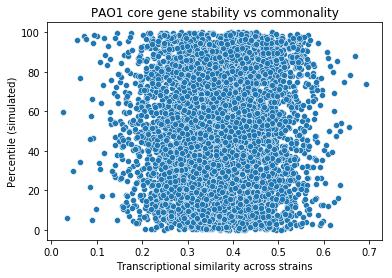

In [8]:
sns.scatterplot(
    data=pao1_all_stats,
    x="Transcriptional similarity across strains",
    y="Percentile (simulated)",
)
plt.title("PAO1 core gene stability vs commonality")

Text(0.5, 1.0, 'PAO1 core gene stability vs commonality (z-score)')

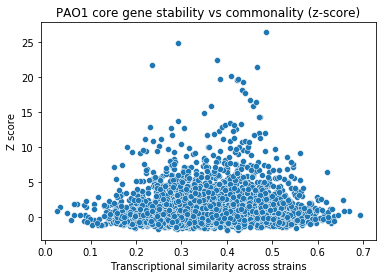

In [11]:
sns.scatterplot(
    data=pao1_all_stats, x="Transcriptional similarity across strains", y="Z score"
)
plt.title("PAO1 core gene stability vs commonality (z-score)")

Text(0.5, 1.0, 'PA14 core gene stability vs commonality')

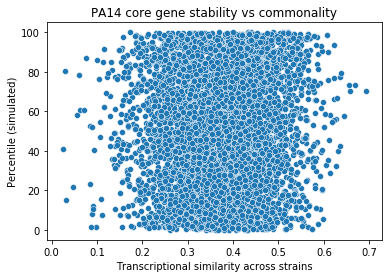

In [10]:
sns.scatterplot(
    data=pa14_all_stats,
    x="Transcriptional similarity across strains",
    y="Percentile (simulated)",
)
plt.title("PA14 core gene stability vs commonality")